# 


<div style="display:inline-block; vertical-align:middle; text-align:center; background-color:orange; padding:25px;">
    <h1 style="font-size:42px; color:white; margin:0;">Exploratory Data Analysis-Global Terrorism</h1>
</div>



<img src="terrorism.jpg" width="800" />

- Import the required Libraries

In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- Import and load the dataset

In [3]:
df=pd.read_csv('D:\Work\Sparks\Global_Terrorism\global_terrorism.csv')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000000,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000000,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000000,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000000,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000000,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

# Data Cleaning

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

- Rename the Columns

In [8]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','latitude':'Latitude','longitude':'Longitude','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attacktype','targtype1_txt':'Target_type','targsubtype1_txt':'Targetsubtype','weaptype1_txt':'Weapontype','weapsubtype1_txt':'Weaponsubtype','motive':'Motive','gname':'Group','nkill':'Killed','nwound':'Wounded','propextent_txt':'property damage'},inplace=True)

- It is evident that the dataset has too many columns. For further processing of tha data, extract a new data frame with the desired column names

In [9]:
df1=df[['Year','Month','Day','Latitude','Longitude','Country','Region','State','city','Attacktype','Target_type','Targetsubtype','Weapontype','Weaponsubtype','Motive','Group','Wounded','Killed','property damage']]

In [10]:
df1.head()

,Year,Month,Day,Latitude,Longitude,Country,Region,State,city,Attacktype,Target_type,Targetsubtype,Weapontype,Weaponsubtype,Motive,Group,Wounded,Killed,property damage
0,1970,7,2,18.46,-69.95,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Unknown,NaN,NaN,MANO-D,0.0,1.0,NaN
1,1970,0,0,19.37,-99.09,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,NaN,NaN,23rd of September Communist League,0.0,0.0,NaN
2,1970,1,0,15.48,120.60,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,NaN,NaN,Unknown,0.0,1.0,NaN
3,1970,1,0,38.00,23.76,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Explosives,Unknown Explosive Type,NaN,Unknown,NaN,NaN,NaN
4,1970,1,0,33.58,130.40,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Incendiary,NaN,NaN,Unknown,NaN,NaN,NaN


In [11]:
df1.dtypes

Year                 int64
Month                int64
Day                  int64
Latitude           float64
Longitude          float64
Country             object
Region              object
State               object
city                object
Attacktype          object
Target_type         object
Targetsubtype       object
Weapontype          object
Weaponsubtype       object
Motive              object
Group               object
Wounded            float64
Killed             float64
property damage     object
dtype: object

In [12]:
df1.shape

(181691, 19)

- It is observed that the number of columns are reduced to 19. From here on, the analysis would be done on the new data frame df1

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Latitude         177135 non-null  float64
 4   Longitude        177134 non-null  float64
 5   Country          181691 non-null  object 
 6   Region           181691 non-null  object 
 7   State            181270 non-null  object 
 8   city             181257 non-null  object 
 9   Attacktype       181691 non-null  object 
 10  Target_type      181691 non-null  object 
 11  Targetsubtype    171318 non-null  object 
 12  Weapontype       181691 non-null  object 
 13  Weaponsubtype    160923 non-null  object 
 14  Motive           50561 non-null   object 
 15  Group            181691 non-null  object 
 16  Wounded          165380 non-null  floa

- The next task is to identify the null values in each column of df1

In [14]:
df1.isnull().sum()

Year                    0
Month                   0
Day                     0
Latitude             4556
Longitude            4557
Country                 0
Region                  0
State                 421
city                  434
Attacktype              0
Target_type             0
Targetsubtype       10373
Weapontype              0
Weaponsubtype       20768
Motive             131130
Group                   0
Wounded             16311
Killed              10313
property damage    117626
dtype: int64

In [15]:
df1.describe()

,Year,Month,Day,Latitude,Longitude,Wounded,Killed
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,165380.000000,171378.000000
mean,2002.638997,6.467277,15.505644,23.498135,-4.586960e+02,3.167668,2.403272
std,13.259430,3.388303,8.814045,18.569392,2.047790e+05,35.949392,11.545741
min,1970.000000,0.000000,0.000000,-53.150000,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510000,4.550000e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.470000,4.325000e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.690000,6.871000e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.630000,1.793700e+02,8191.000000,1570.000000


### Observations:

- The describe method returns the numerical data excluding the null values.The following are some key observations
- The highest number of people wounded were 8191 

- And the highest number of people got killed were 1570


In [16]:
df1['Killed']=df1['Killed'].fillna(0)
df1['Wounded']=df1['Wounded'].fillna(0)
df1['Casualties']=df1['Killed']+df1['Wounded']

In [17]:
df1.describe()

,Year,Month,Day,Latitude,Longitude,Wounded,Killed,Casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498135,-4.586960e+02,2.883296,2.266860,5.150156
std,13.259430,3.388303,8.814045,18.569392,2.047790e+05,34.309747,11.227057,40.555416
min,1970.000000,0.000000,0.000000,-53.150000,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510000,4.550000e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.470000,4.325000e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.690000,6.871000e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.630000,1.793700e+02,8191.000000,1570.000000,9574.000000


- Maximum number of casualties a 9574 and the **total number of Casualties** reported between **1970 and 2017** were **181691**

# Visualization 

##### Let's find the country that has suffered the most number of attacks
+ Method value_counts() gives the count 

In [18]:
#df1['Country'].value_counts().idxmax()+" "+str(df1['Country'].value_counts().max()) 
df1['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

- Iraq suffered the highest number of attacks

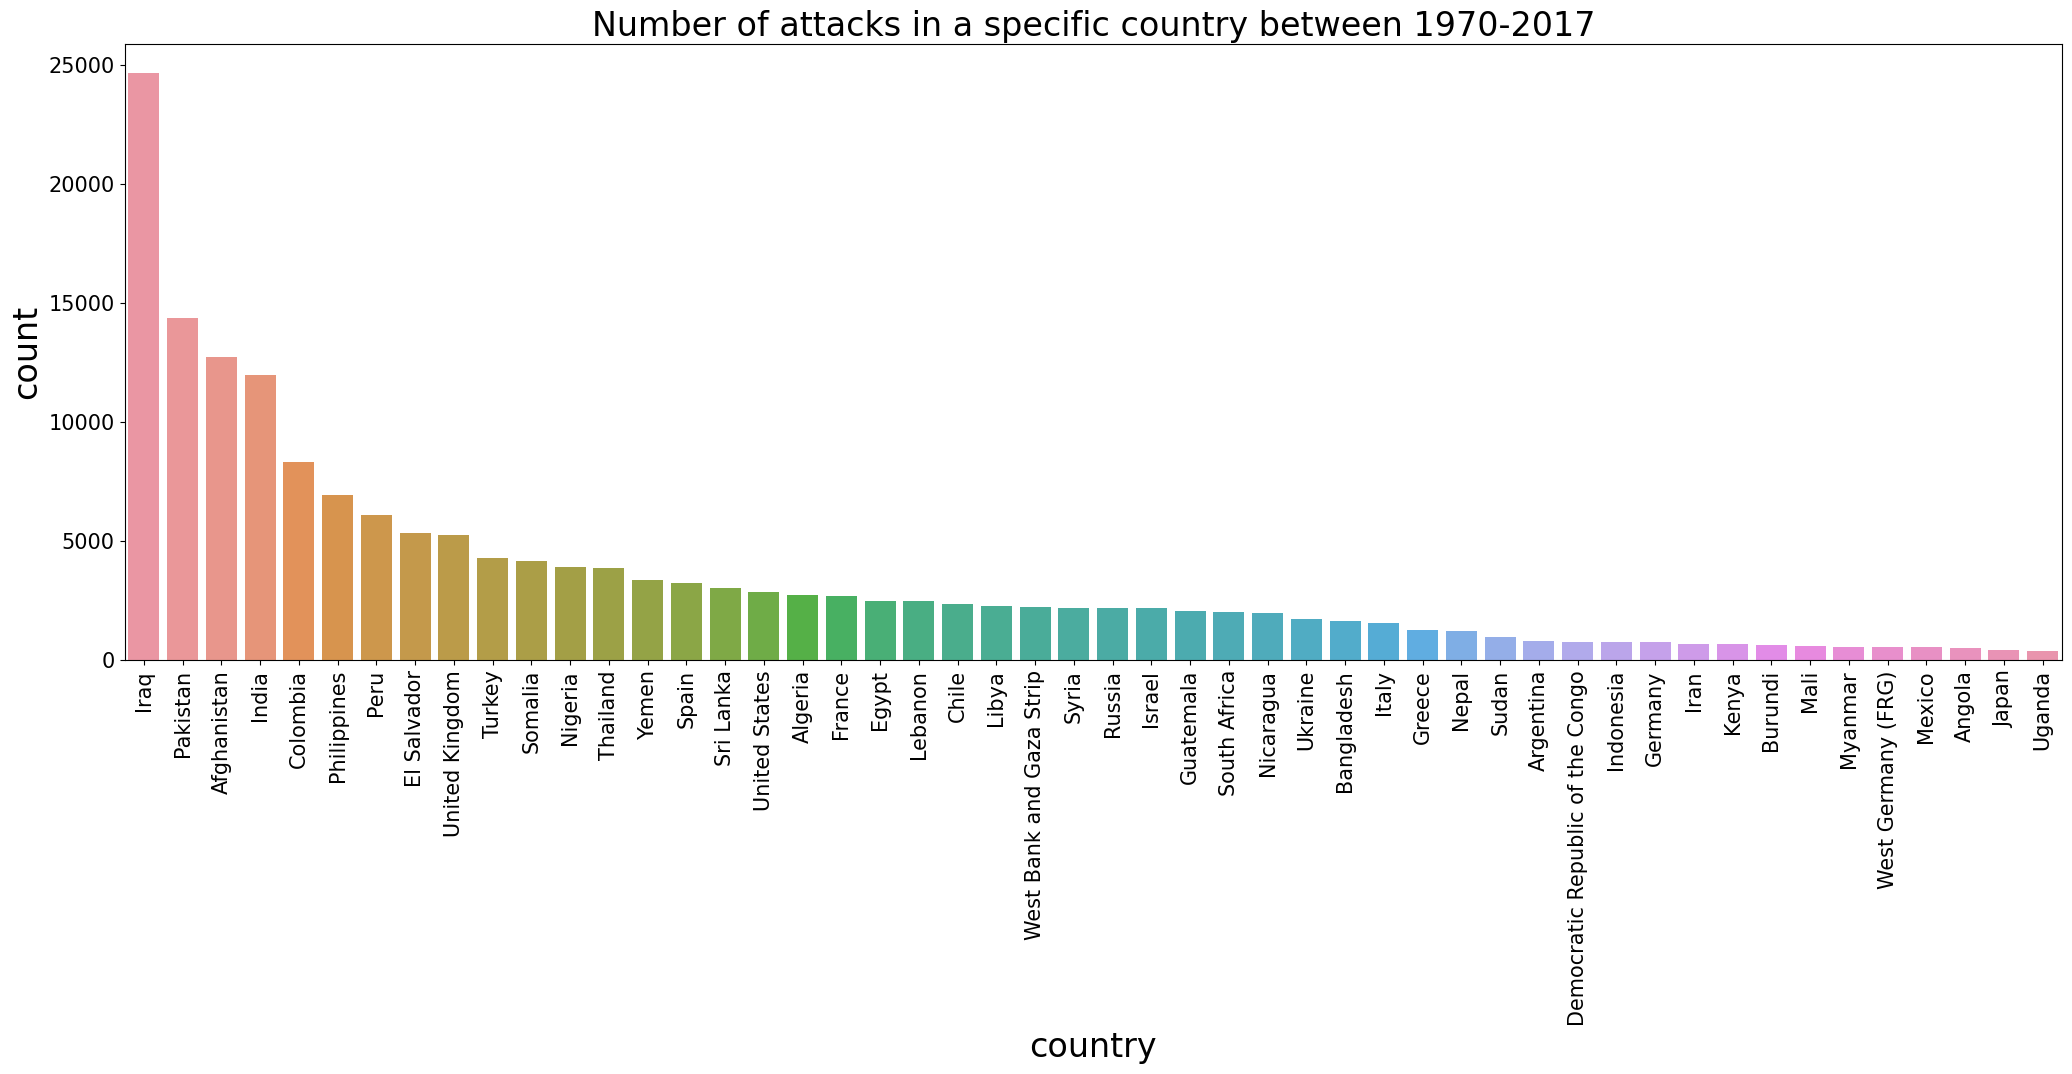

In [19]:
plt.subplots(figsize=(25,8))
sns.countplot('Country',data=df1,order=df1['Country'].value_counts().index[:50])
plt.title('Number of attacks in a specific country between 1970-2017',fontsize=24)
plt.xlabel('country',fontsize=24)
plt.ylabel('count',fontsize=24)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15,)
plt.show()

##### Let's find the State that has suffered the most number of attacks

In [20]:
#df1['State'].value_counts() 
df1['State'].value_counts().drop('Unknown')

Baghdad                  7645
Northern Ireland         4498
Balochistan              3710
Saladin                  3411
Al Anbar                 3299
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: State, Length: 2854, dtype: int64

- State Baghdad was frequently attacked  

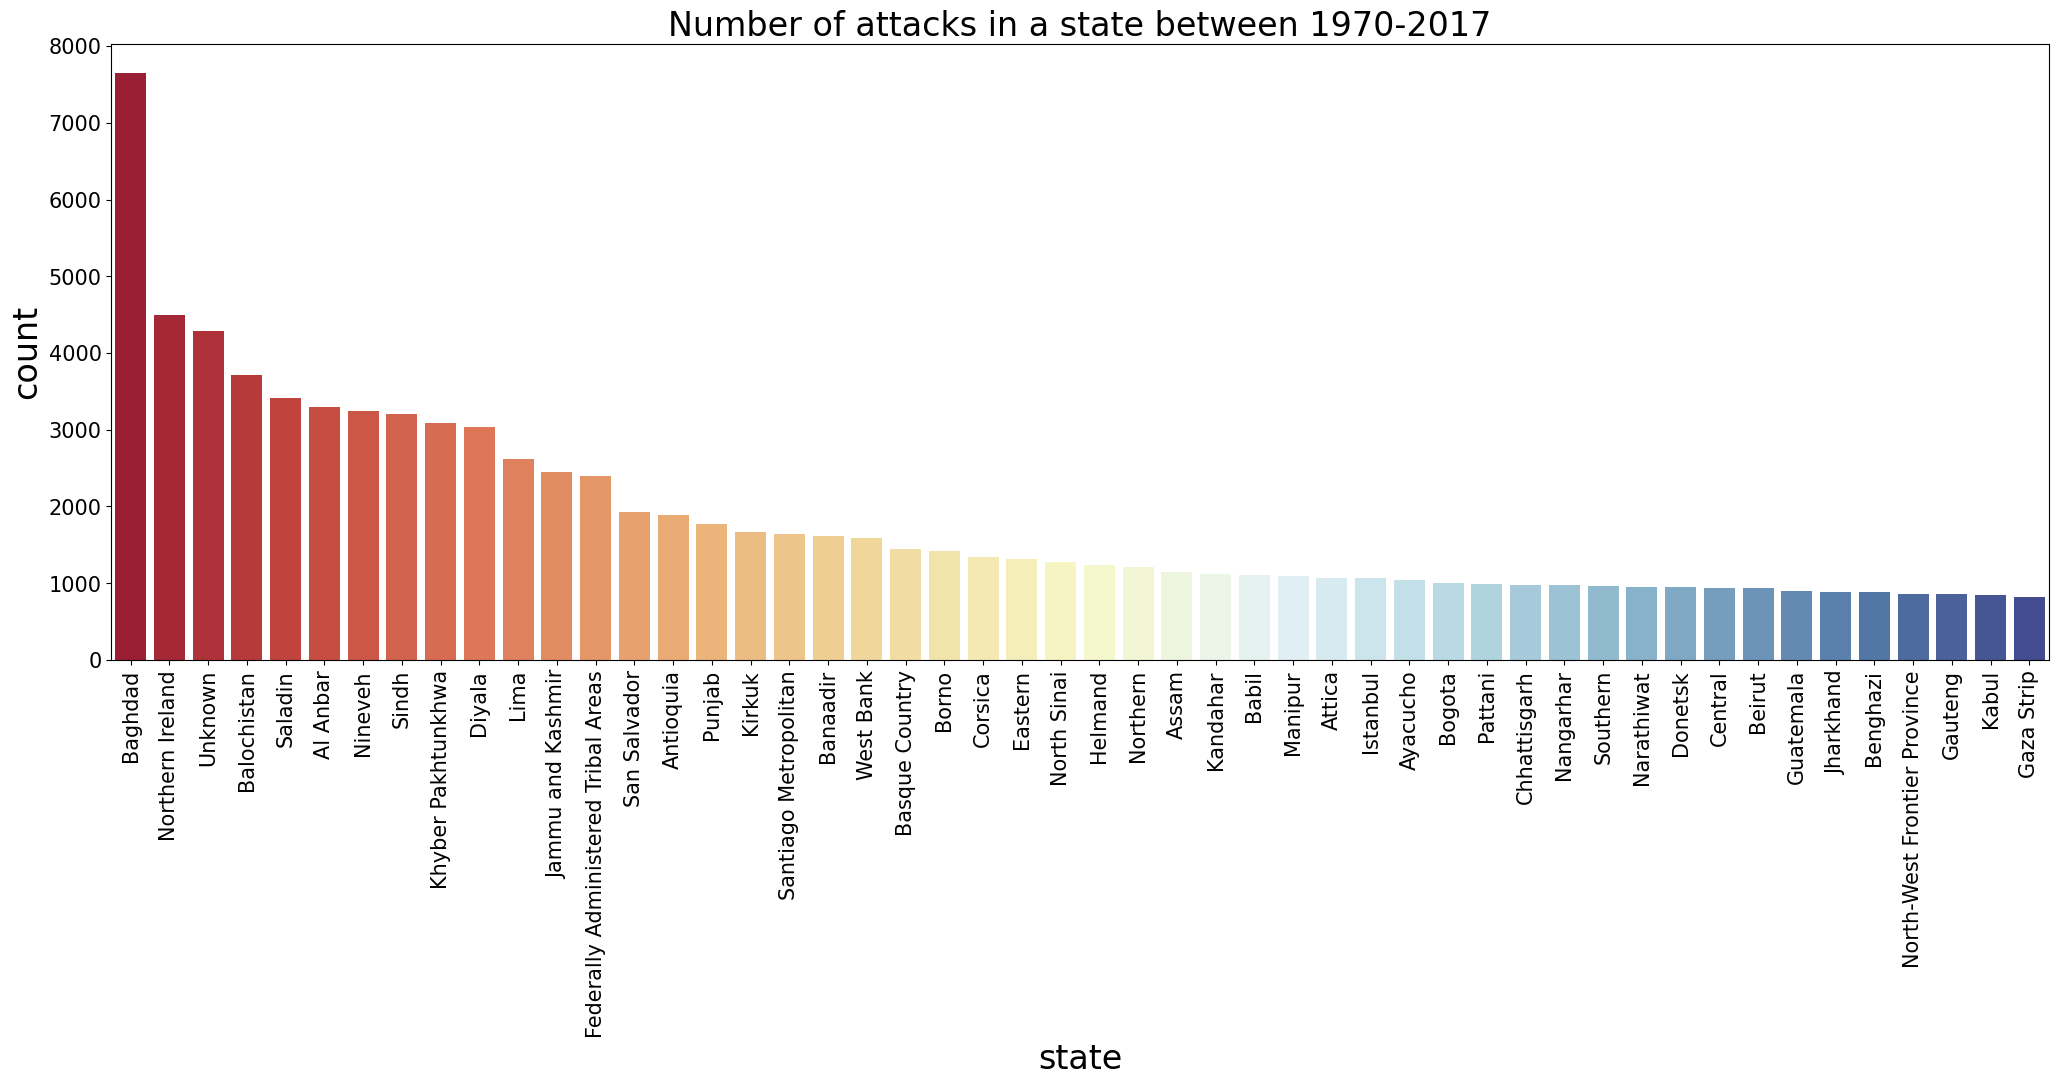

In [21]:
plt.subplots(figsize=(25,8))
sns.countplot('State',data=df1,palette='RdYlBu',order=df1['State'].value_counts().index[:50])
plt.title('Number of attacks in a state between 1970-2017',fontsize=24)
plt.xlabel('state',fontsize=24)
plt.ylabel('count',fontsize=24)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [22]:
cs=df1[["Country","State"]].value_counts()
cs.head(10)

Country         State             
Iraq            Baghdad               7644
United Kingdom  Northern Ireland      4498
Pakistan        Balochistan           3710
Iraq            Saladin               3411
                Al Anbar              3299
                Nineveh               3241
Pakistan        Sindh                 3206
                Khyber Pakhtunkhwa    3084
Iraq            Diyala                3041
Peru            Lima                  2615
dtype: int64

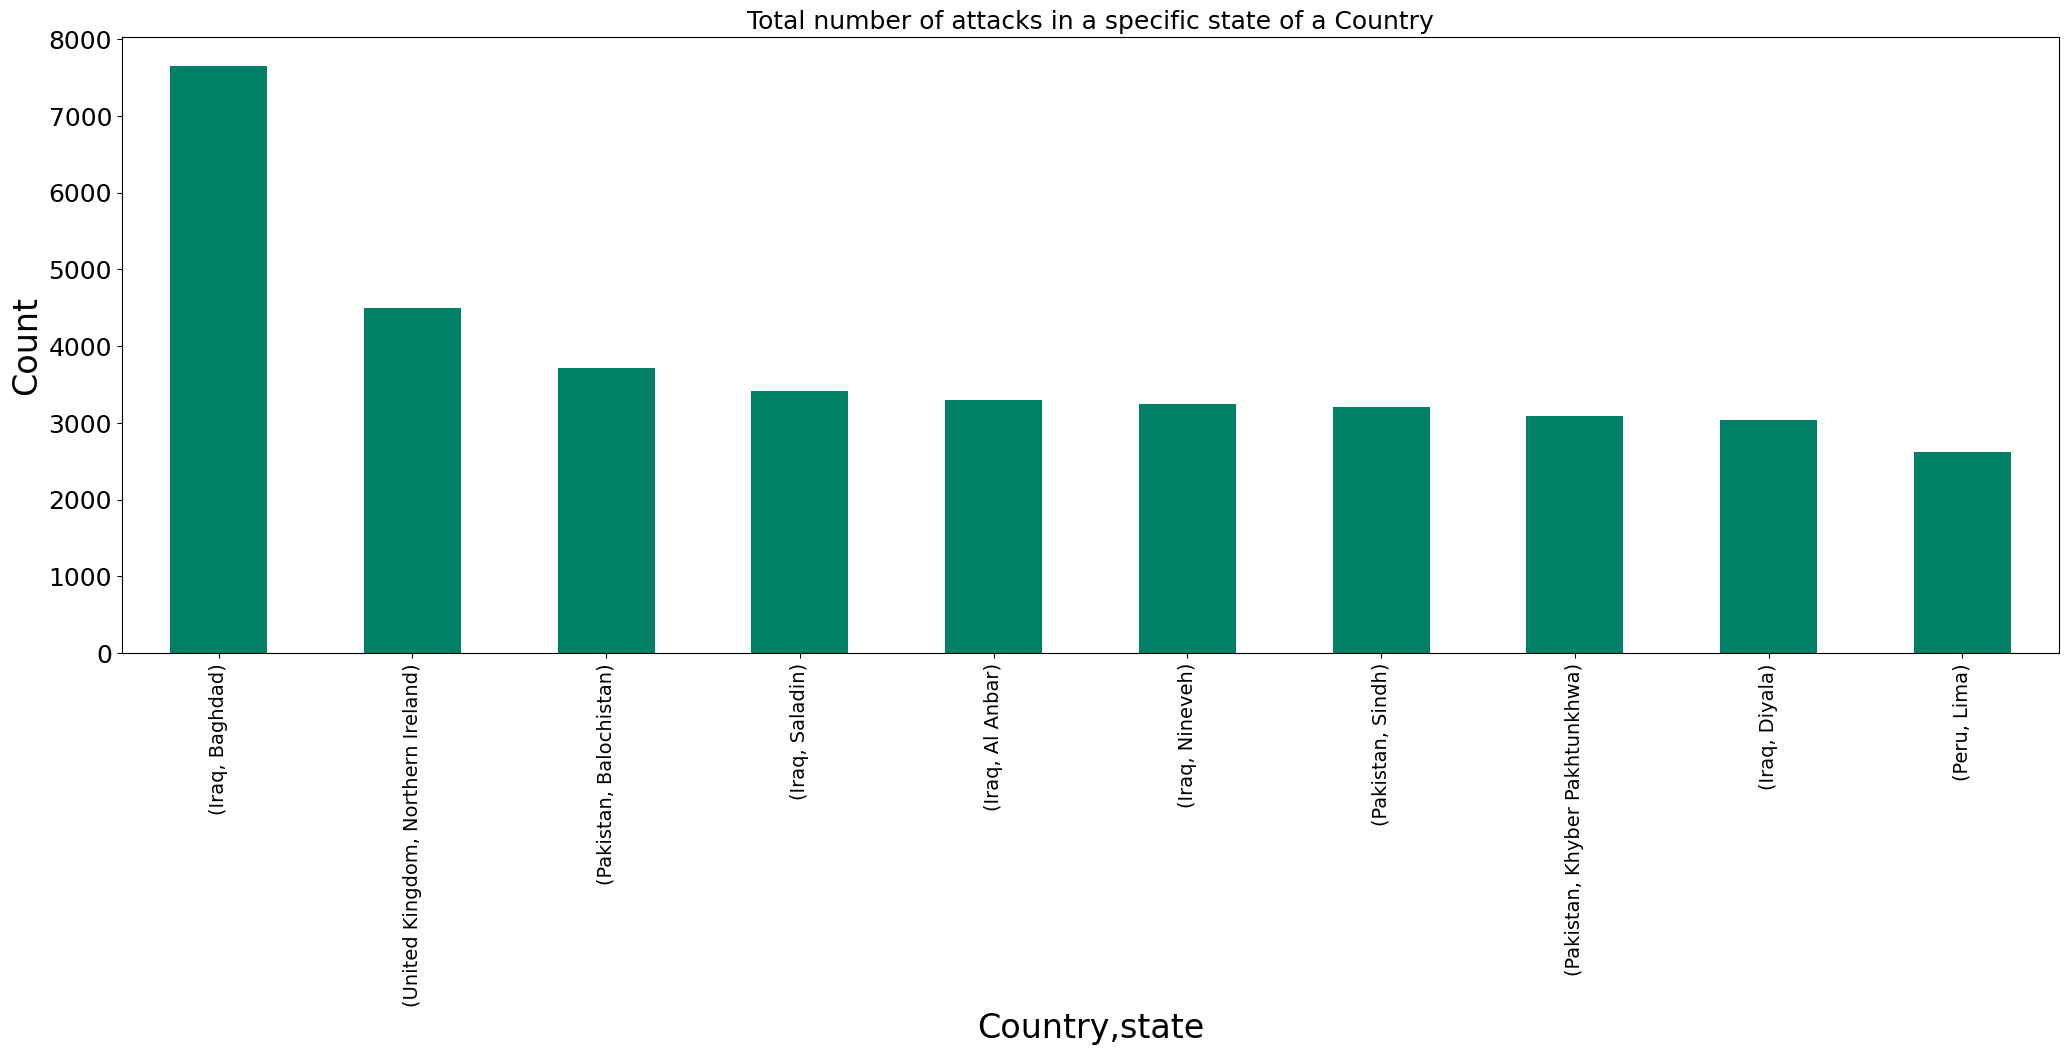

In [23]:
cs.head(10).plot(kind='bar',cmap='summer',figsize=(25,8))
#cs.head(10).plot(kind ='line',linestyle='--',marker='o',markersize=25,color='red',figsize=(25,12))
plt.xlabel('Country,state',fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.title('Total number of attacks in a specific state of a Country',fontsize=18)
plt.show()

## City Wise Attacks

In [24]:
df1['city'].value_counts()[1:] 

Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
Belfast      2171
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36673, dtype: int64

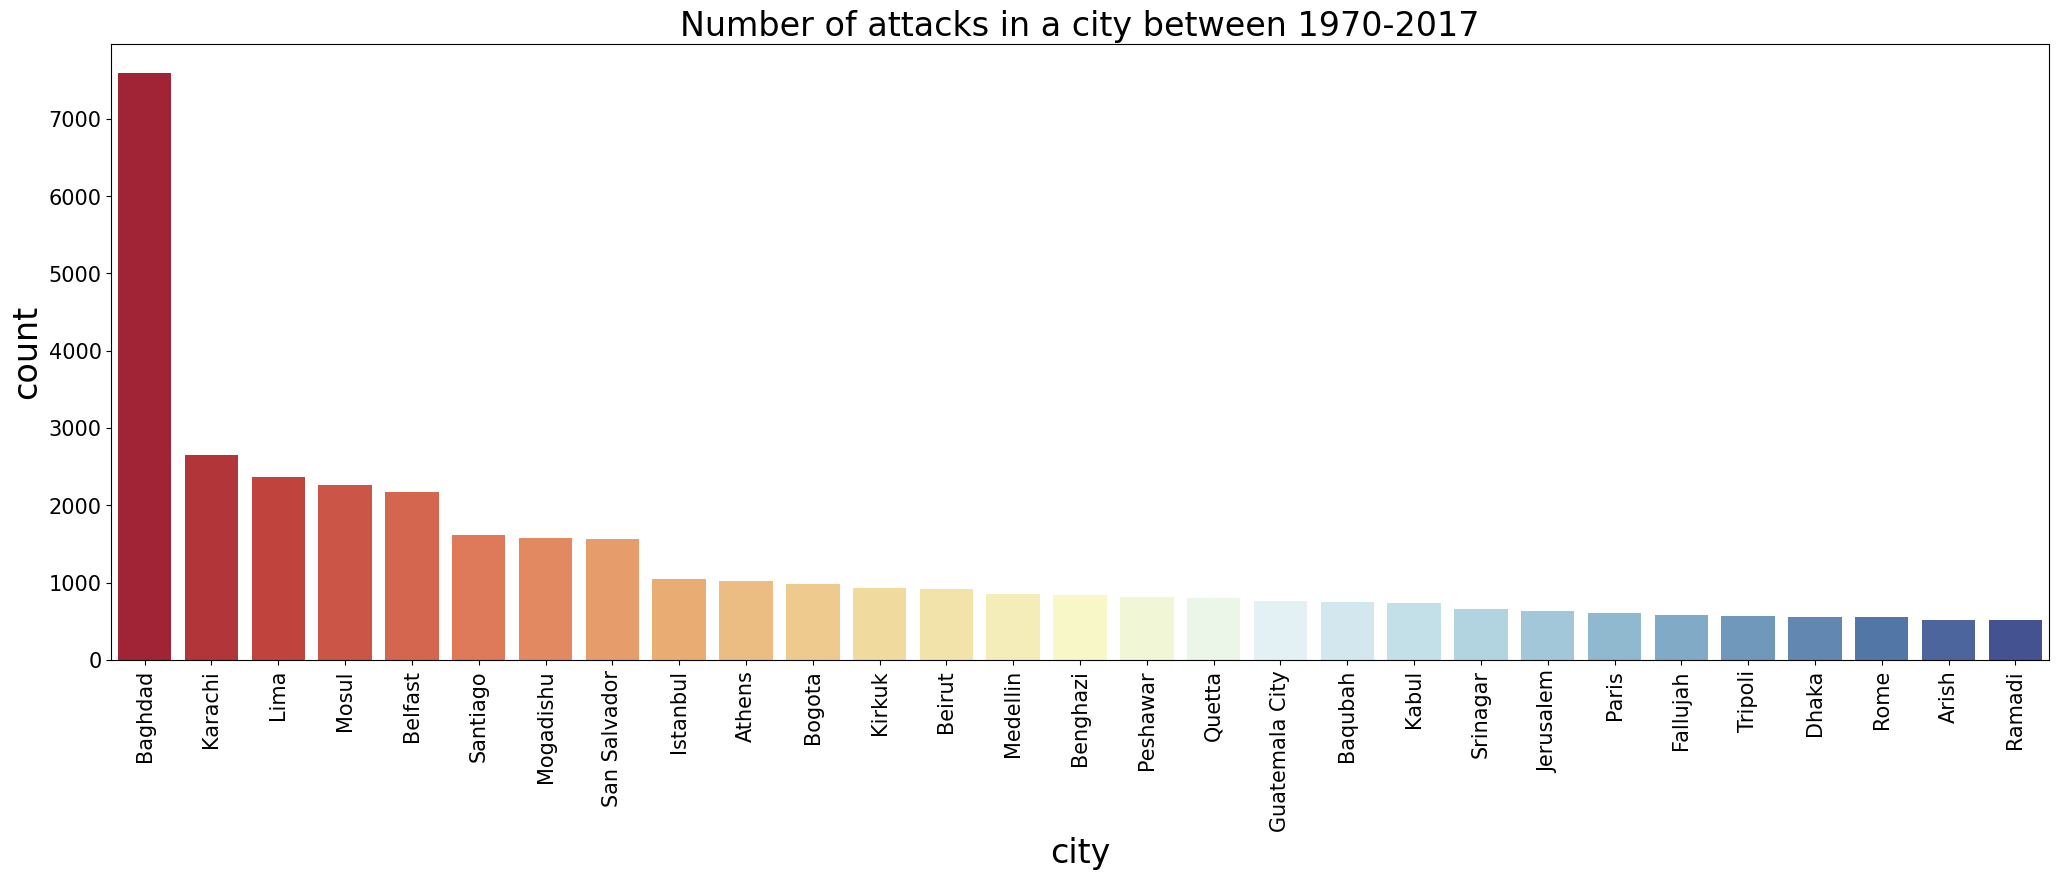

In [25]:
plt.subplots(figsize=(25,8))
sns.countplot('city',data=df1,palette='RdYlBu',order=df1['city'].value_counts().index[1:30])
plt.title('Number of attacks in a city between 1970-2017',fontsize=24)
plt.xlabel('city',fontsize=24)
plt.ylabel('count',fontsize=24)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Number of attacks in each year

In [26]:
df1['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

In [27]:
attacks_count=df1['Year'].value_counts().sort_index()

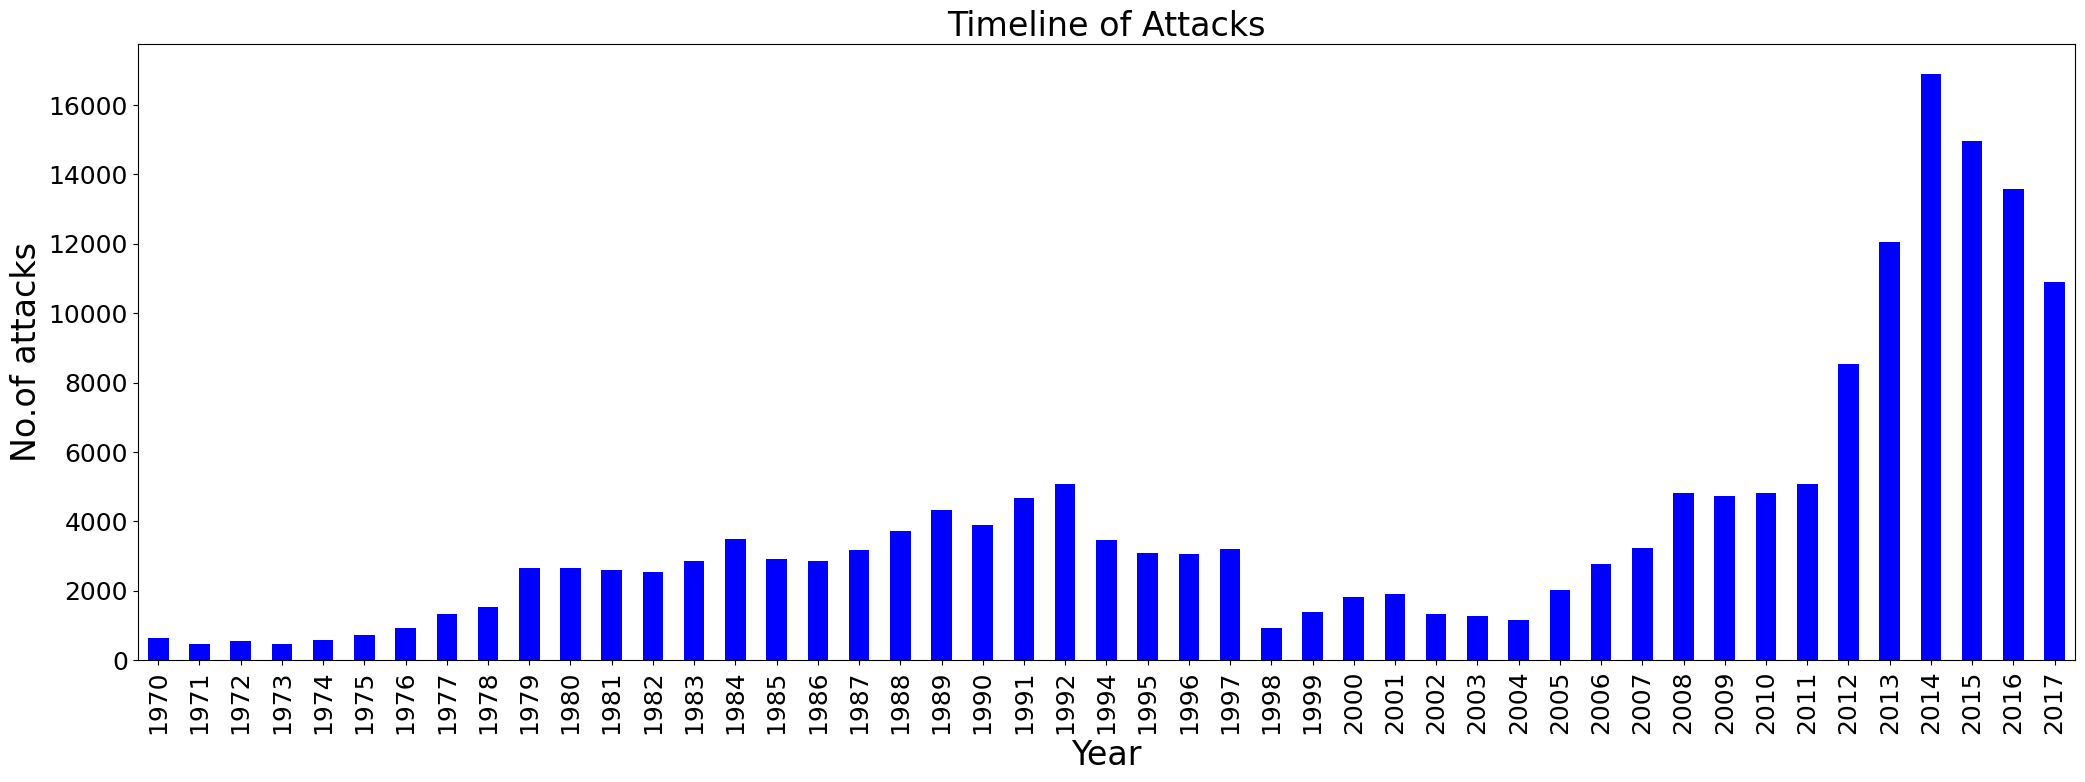

In [243]:
plt.figure(figsize=(25,8))
attacks_count.plot.bar(color='blue')
plt.title('Timeline of Attacks',fontsize=24)
plt.xlabel('Year',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('No.of attacks',fontsize=24)
plt.show()

## Year wise Casualties

In [28]:
#yc represents the year wise casualties from 1970-2017
yc=df1[["Year","Casualties"]].groupby("Year").sum()

In [29]:
yc.head()

,Casualties
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


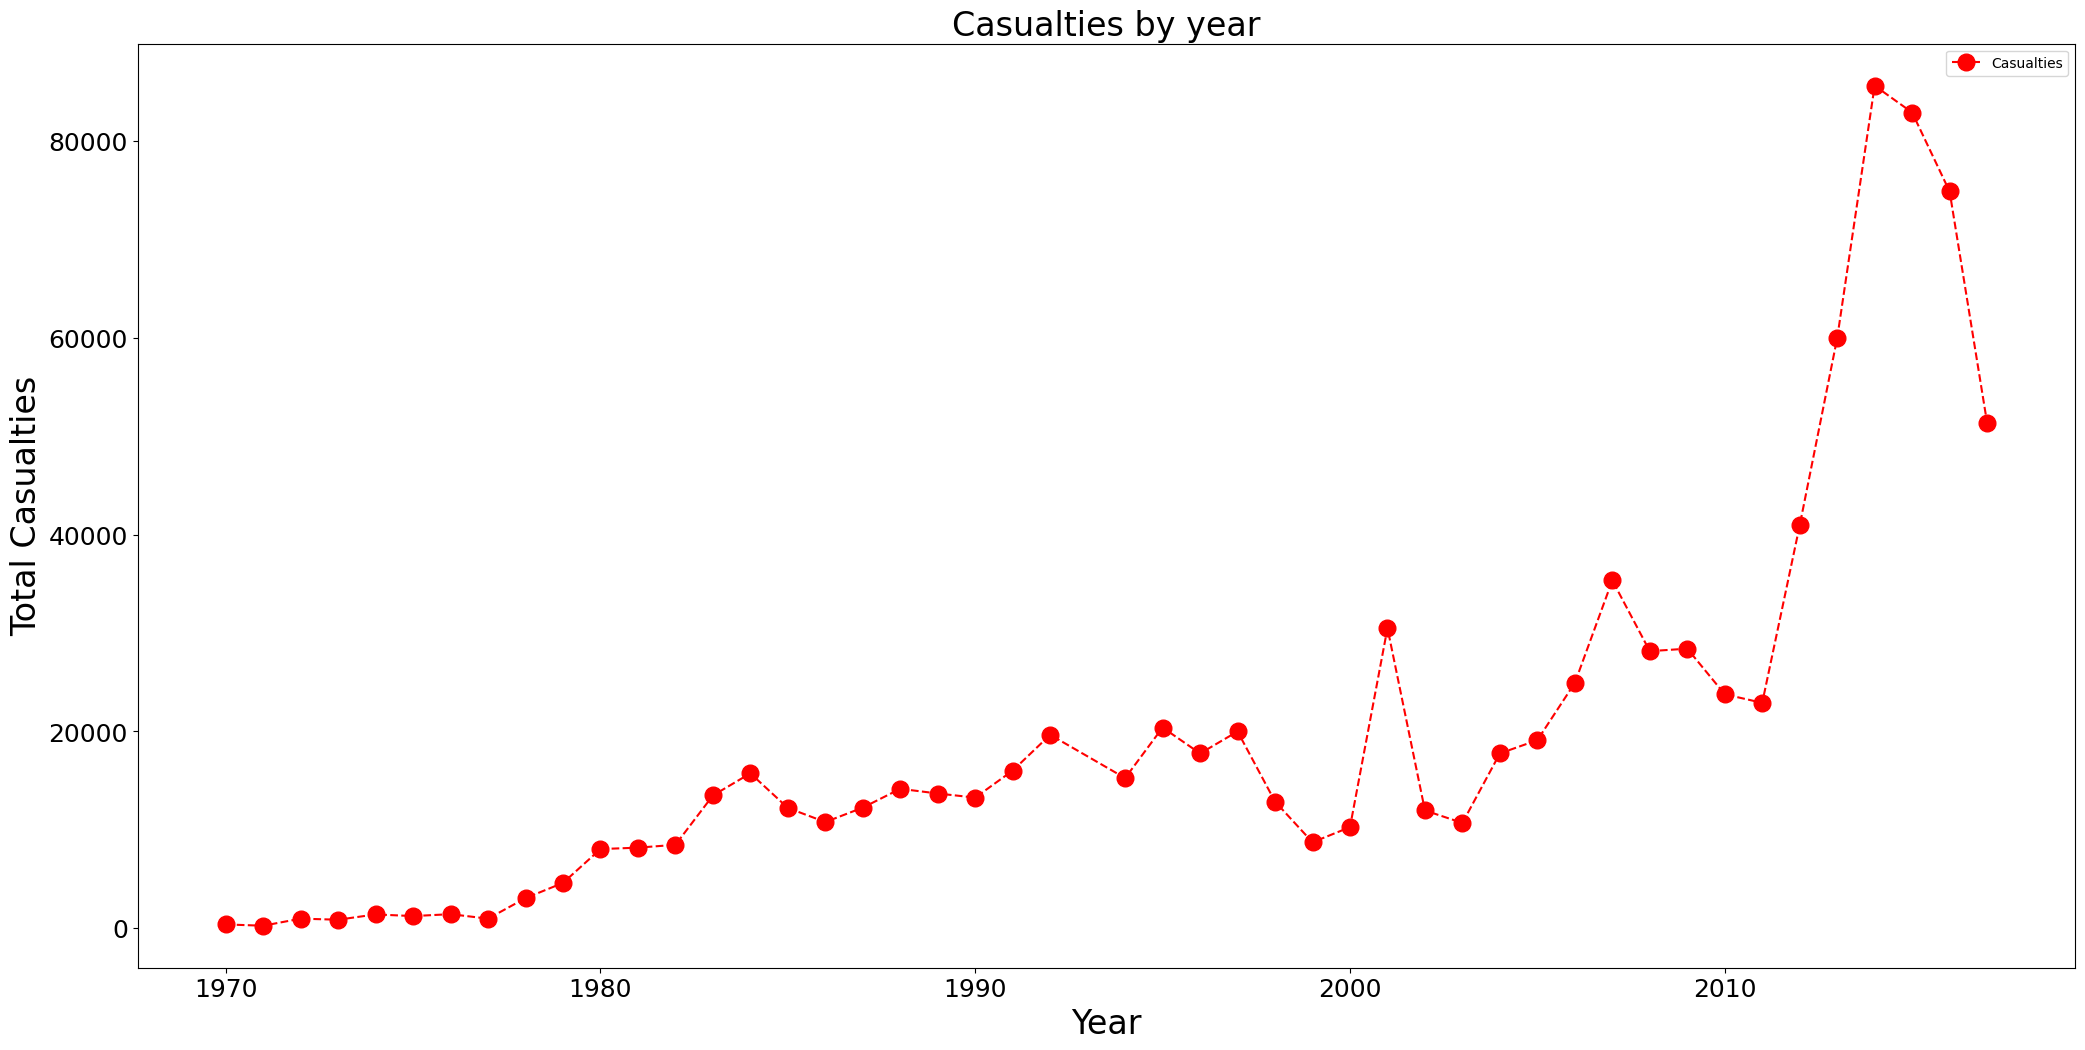

In [30]:
yc.plot(kind ='line',linestyle='--',marker='o',markersize=12,color='red',figsize=(25,12))
plt.xlabel('Year',fontsize=24)
plt.ylabel('Total Casualties',fontsize=24)
plt.title('Casualties by year',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## Region Wise Attacks over the period 1970-2017

In [31]:
#ra represents Regionwise attacks 
ra=pd.crosstab(df1.Year,df1.Region)


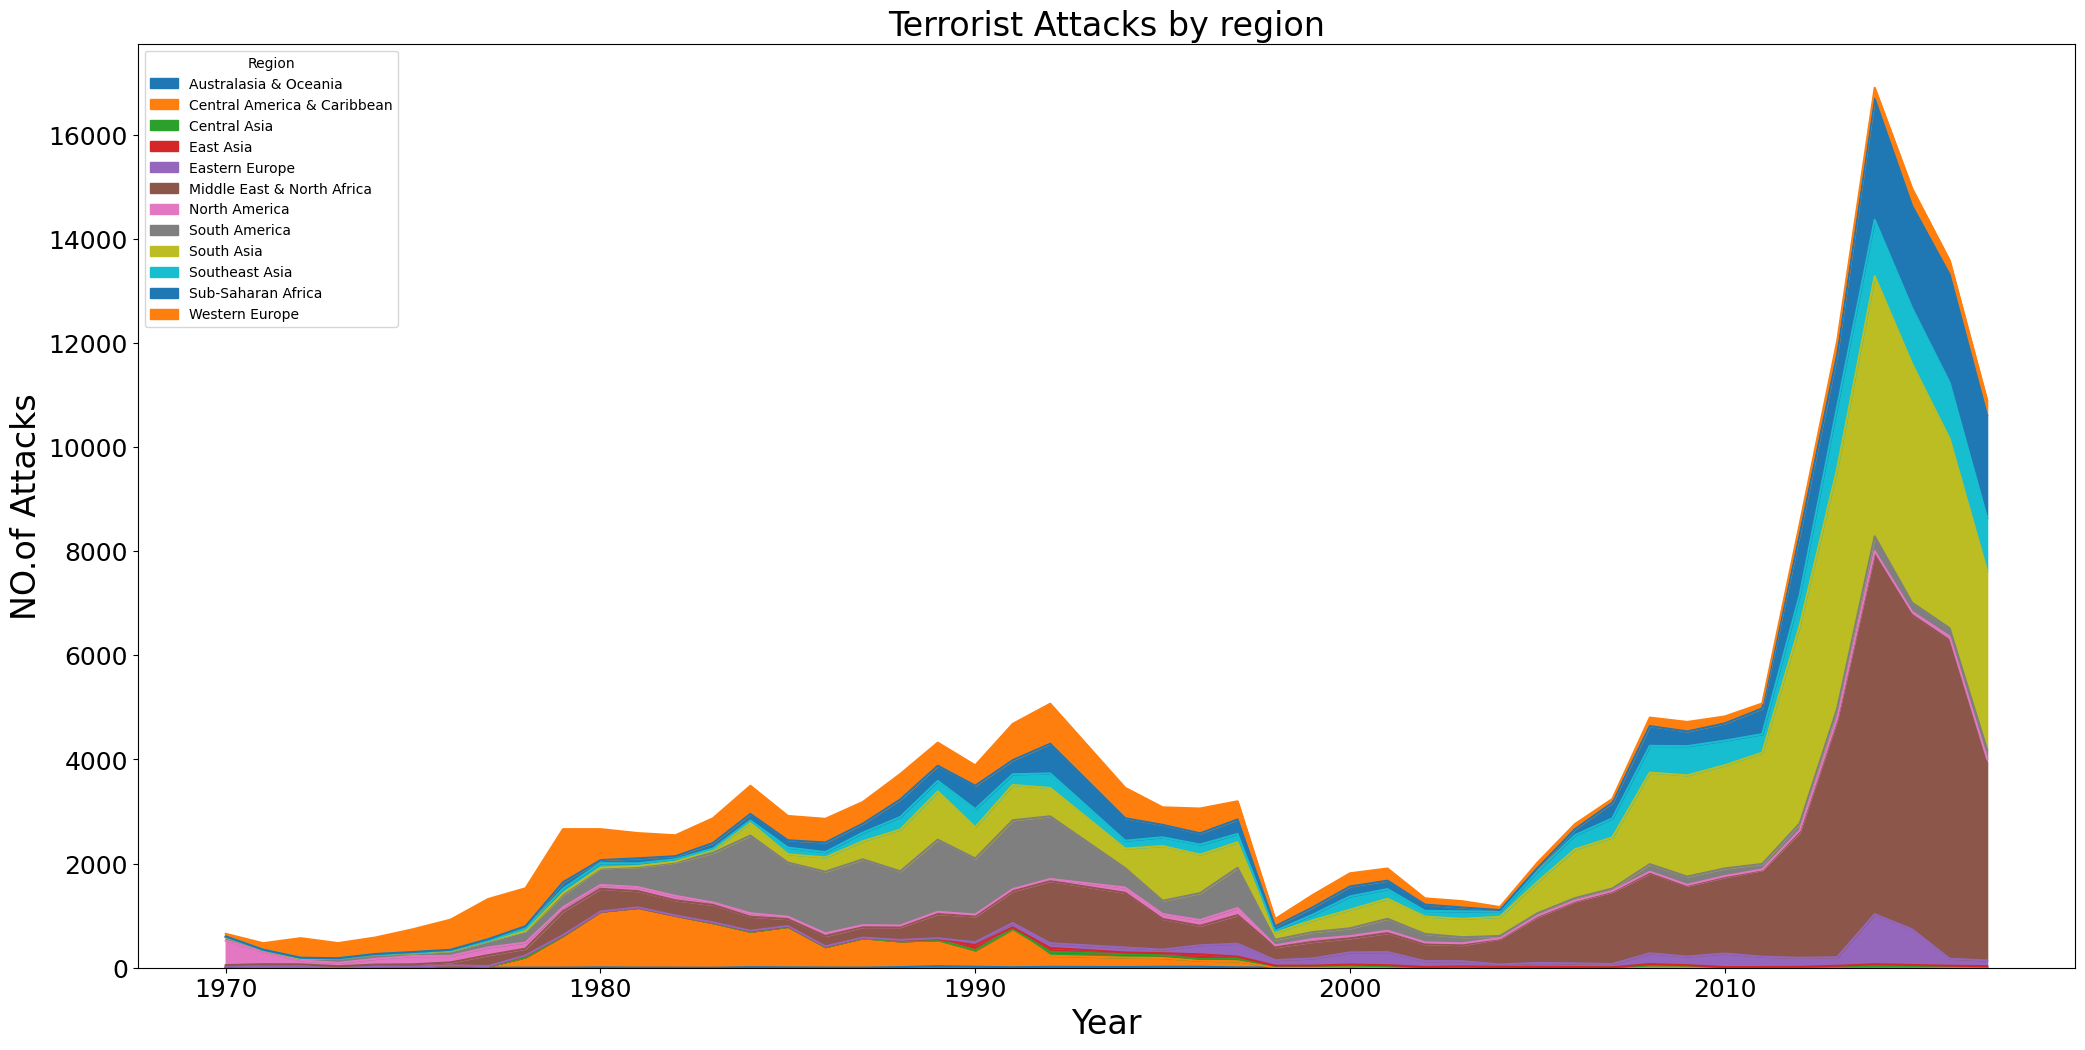

In [32]:
ra.plot(kind='area',figsize=(25,12))
plt.title('Terrorist Attacks by region',fontsize=24)
plt.xlabel('Year',fontsize=24)
plt.ylabel('NO.of Attacks',fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

   - Let's count the number of attacks by region

In [33]:
#tar denotes total number of attacks in a region
tar=df1["Region"].value_counts()
tar

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

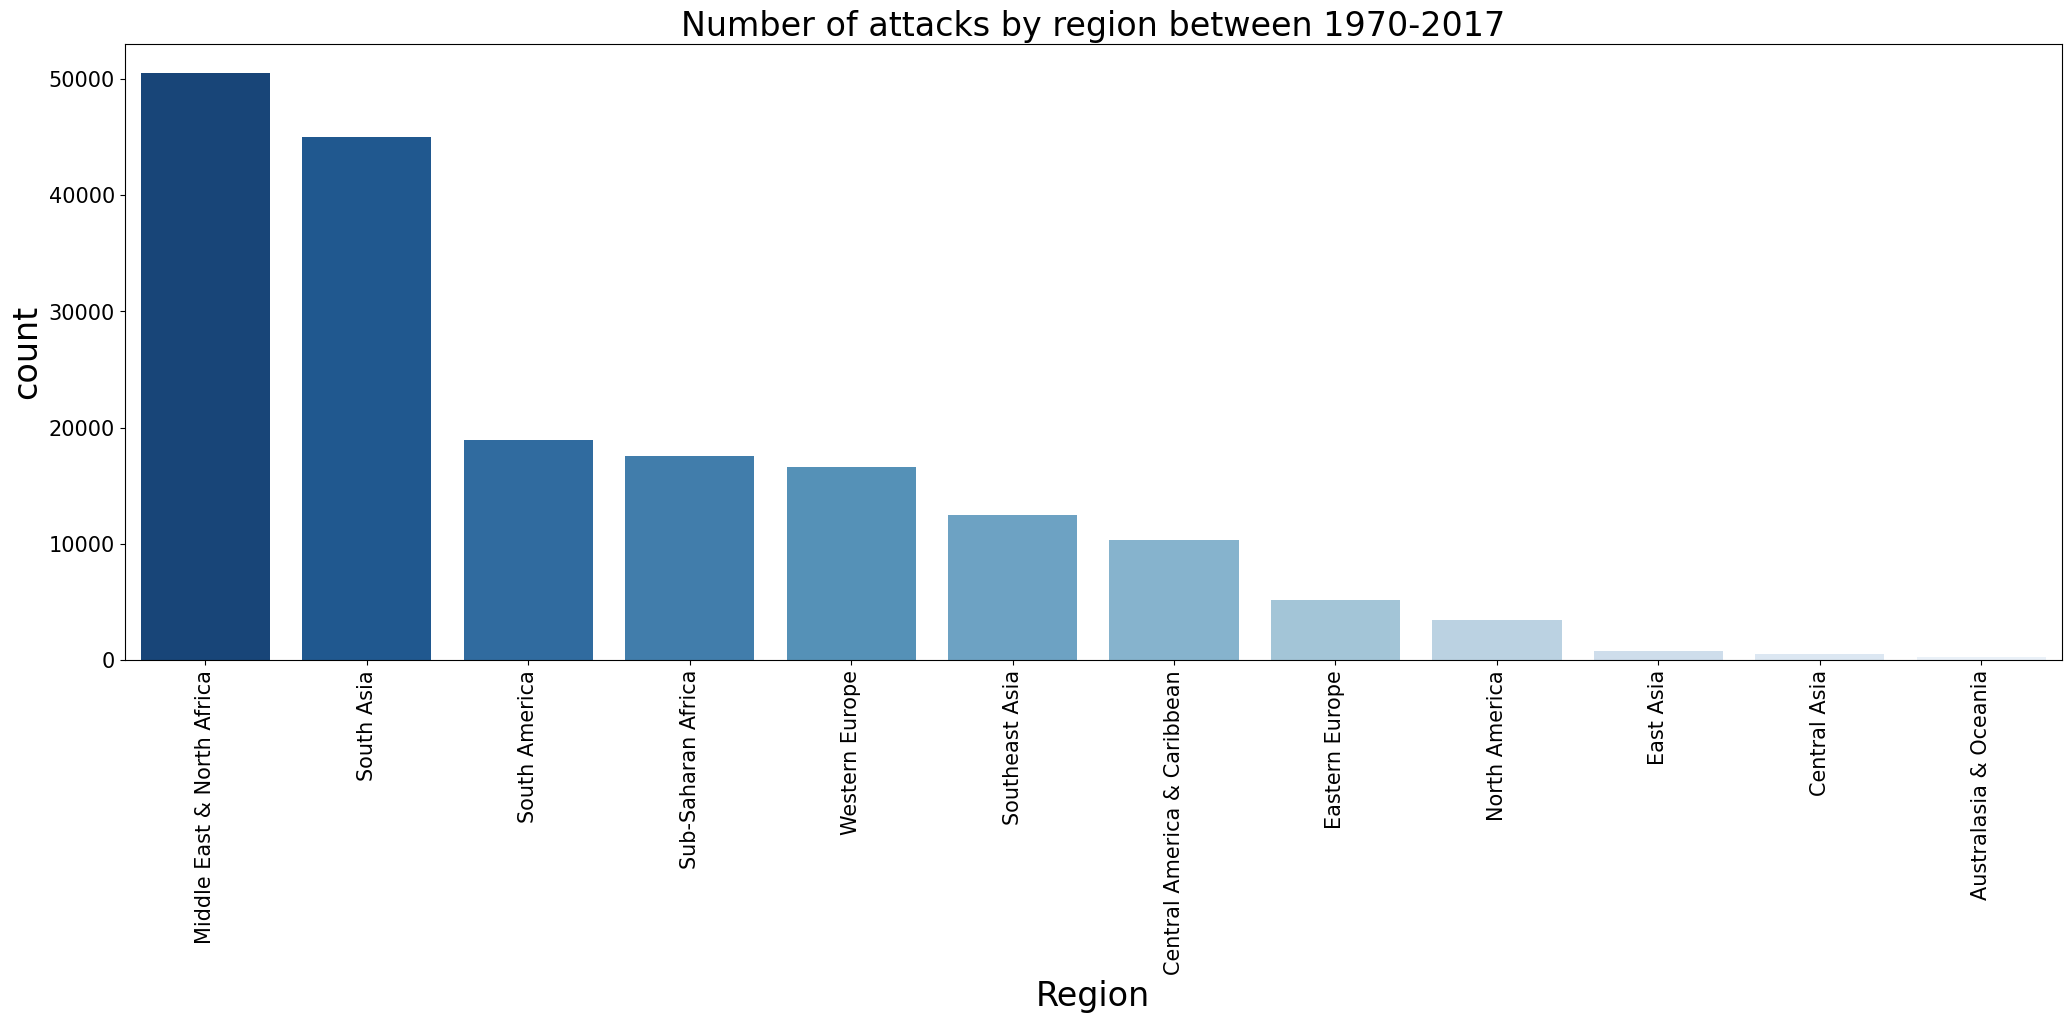

In [34]:
plt.subplots(figsize=(25,8))
sns.countplot('Region',data=df1,palette='Blues_r',order=df1['Region'].value_counts().index)
plt.title('Number of attacks by region between 1970-2017',fontsize=24)
plt.xlabel('Region',fontsize=24)
plt.ylabel('count',fontsize=24)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15,)
plt.show()

## Attack Type Distribution over the period 1970-2017

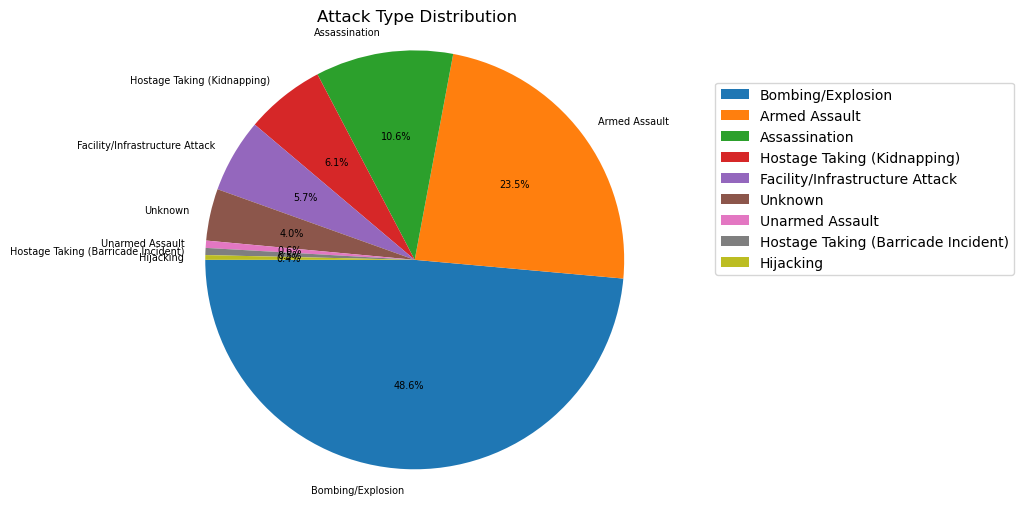

In [35]:
#Attacktype
# # Count the number of attacks for each attack type
attack_counts = df1['Attacktype'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6,6))
plt.pie(attack_counts,labels=attack_counts.index,autopct='%2.1f%%',textprops={'fontsize':7}, startangle=180)
plt.title('Attack Type Distribution')
plt.axis('equal')
plt.legend(attack_counts.index,loc='upper right',bbox_to_anchor = (1.4,0.5,0.4,0.4))
plt.show()
# Count the number of attacks for each attack type


## Most frequent Target of Terrorists

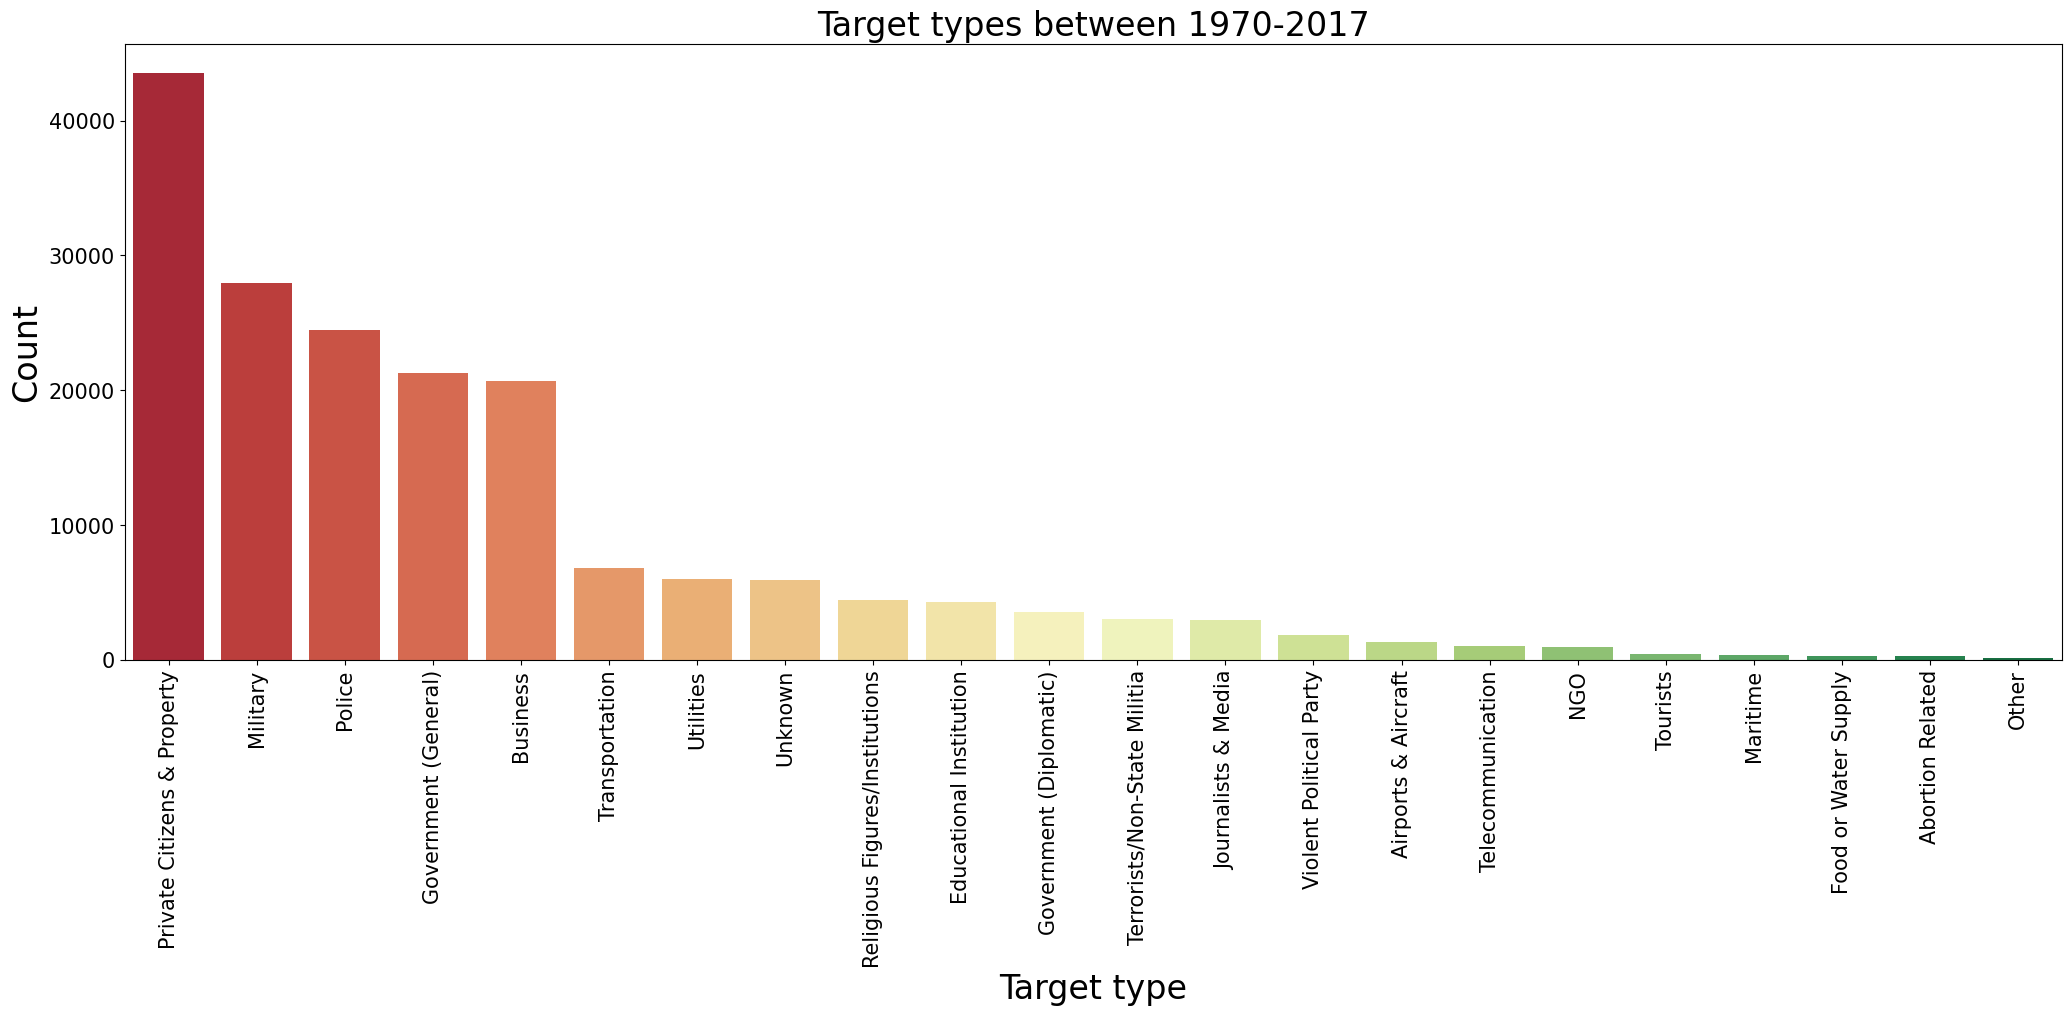

In [36]:
#plot a countplot
plt.subplots(figsize=(25,8))
sns.countplot('Target_type',data=df1,palette='RdYlGn',order=df1['Target_type'].value_counts().index[:50])
plt.title('Target types between 1970-2017',fontsize=24)
plt.xlabel('Target type',fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15,)
plt.show()

## Group wise Attacks 

In [37]:
#ga denotes the group wise attacks
ga=df1['Group'].value_counts()[1:10]
ga


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

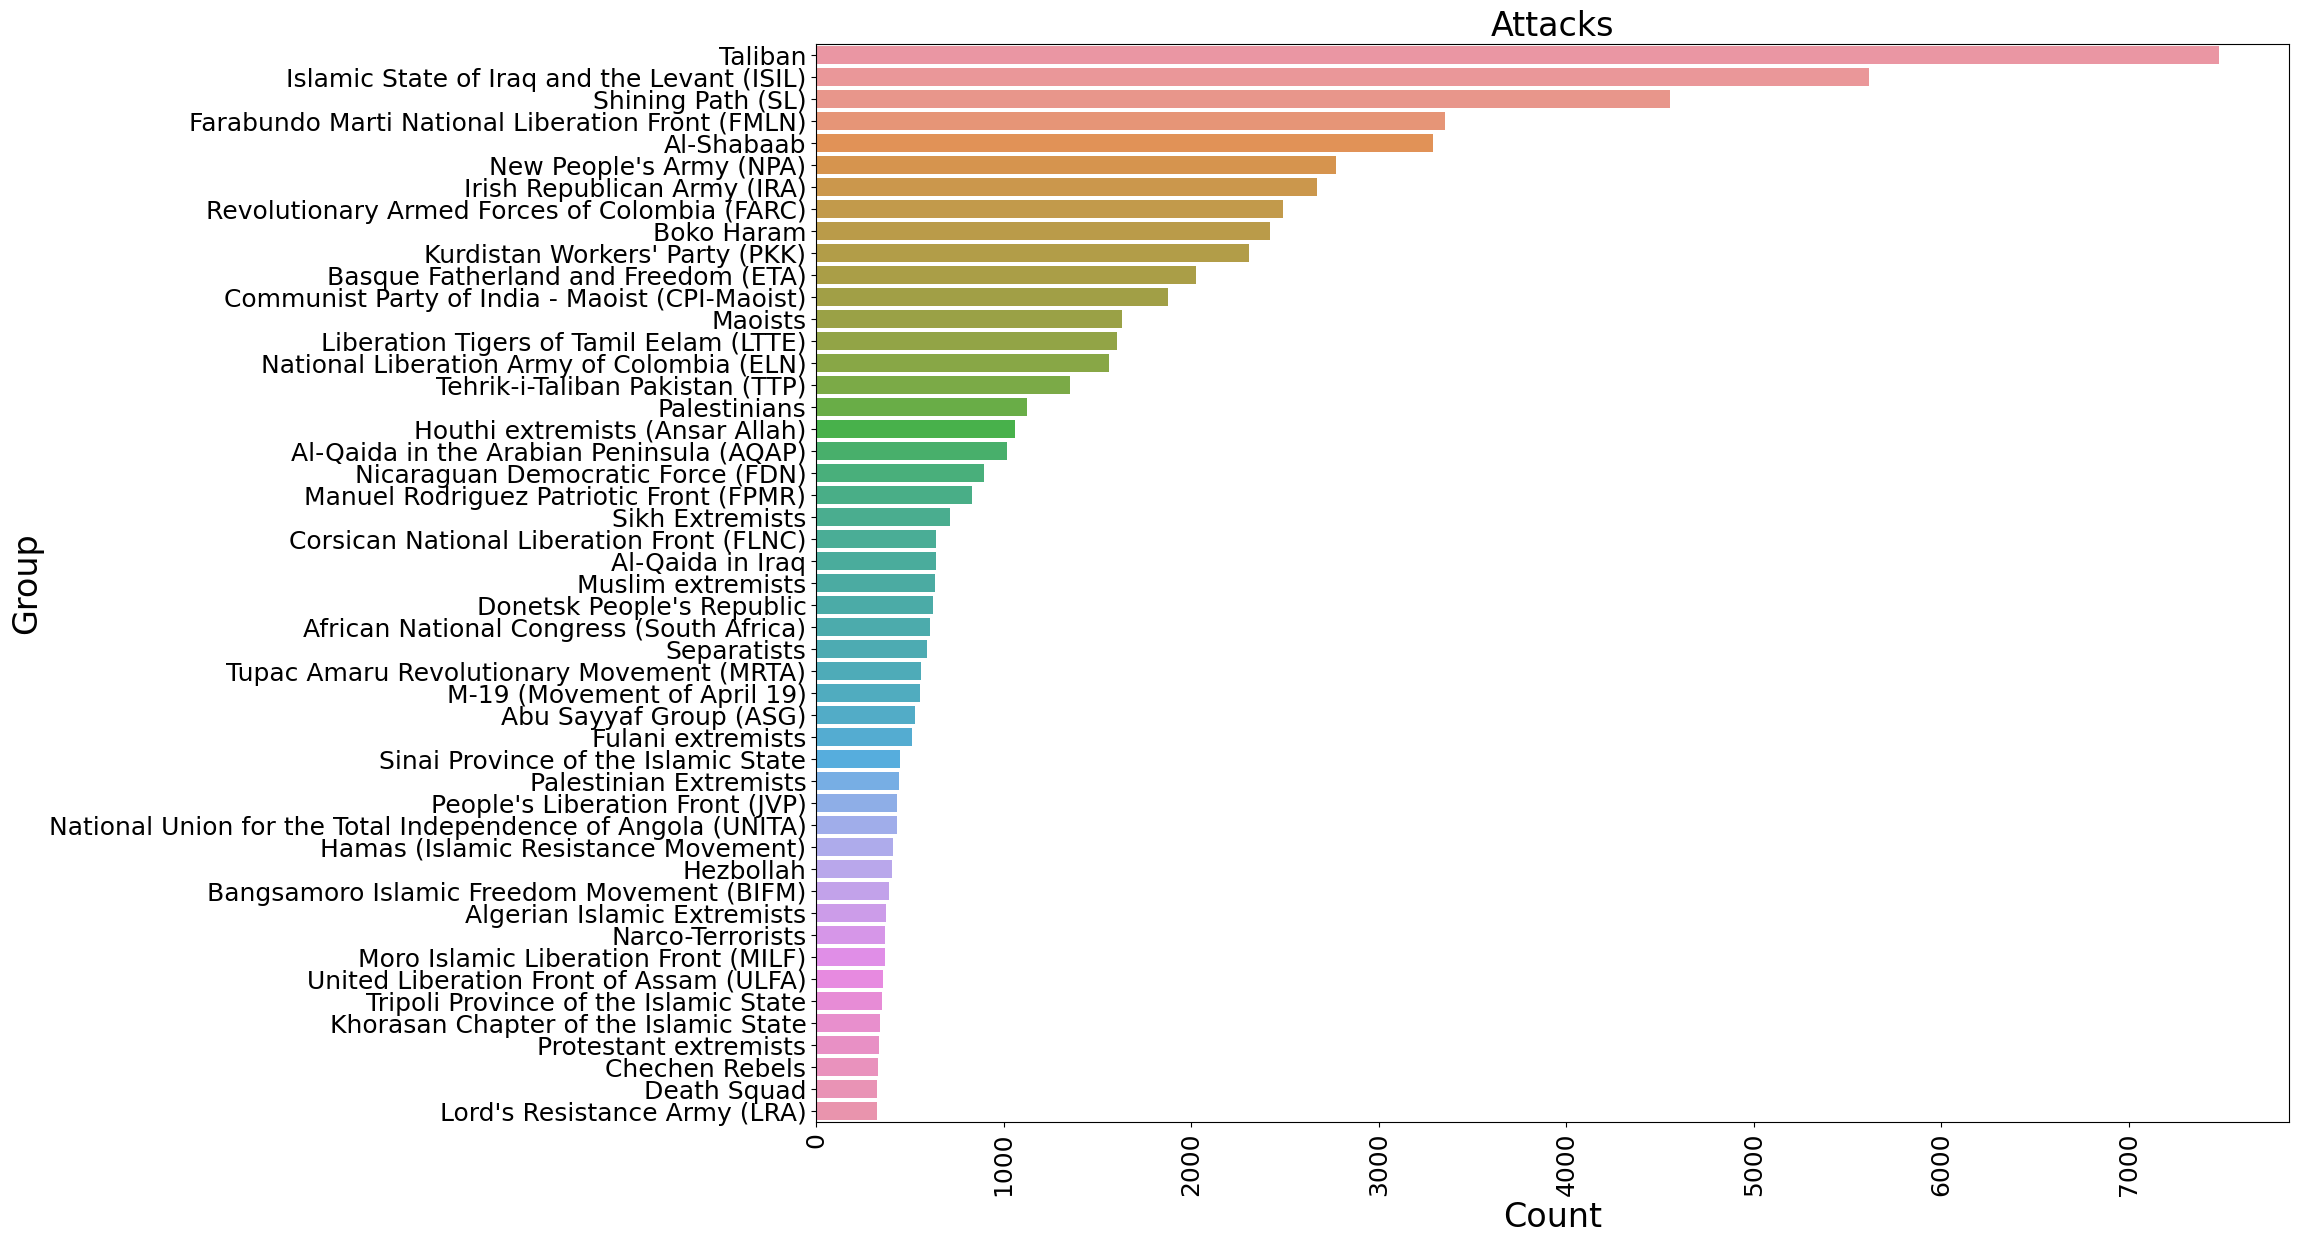

In [38]:
#plot a countplot 
plt.subplots(figsize=(19,14))
sns.countplot(y='Group',data=df1,order=df1['Group'].value_counts().index[1:50])
plt.ylabel('Group',fontsize=24)
plt.xlabel('Count',fontsize=24)
plt.xticks(fontsize=18,rotation =90)
plt.yticks(fontsize=18)
plt.title('Attacks',fontsize=24)
plt.show()

## Group wise casualties

In [39]:
#tcg denotes group wise casualties
tcg=df1[['Group','Casualties']].groupby('Group').sum().sort_values(by="Casualties",ascending=False).drop("Unknown")
tcg.head(20)

,Casualties
Group,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


## Total Casualties by each Terrorist Group 

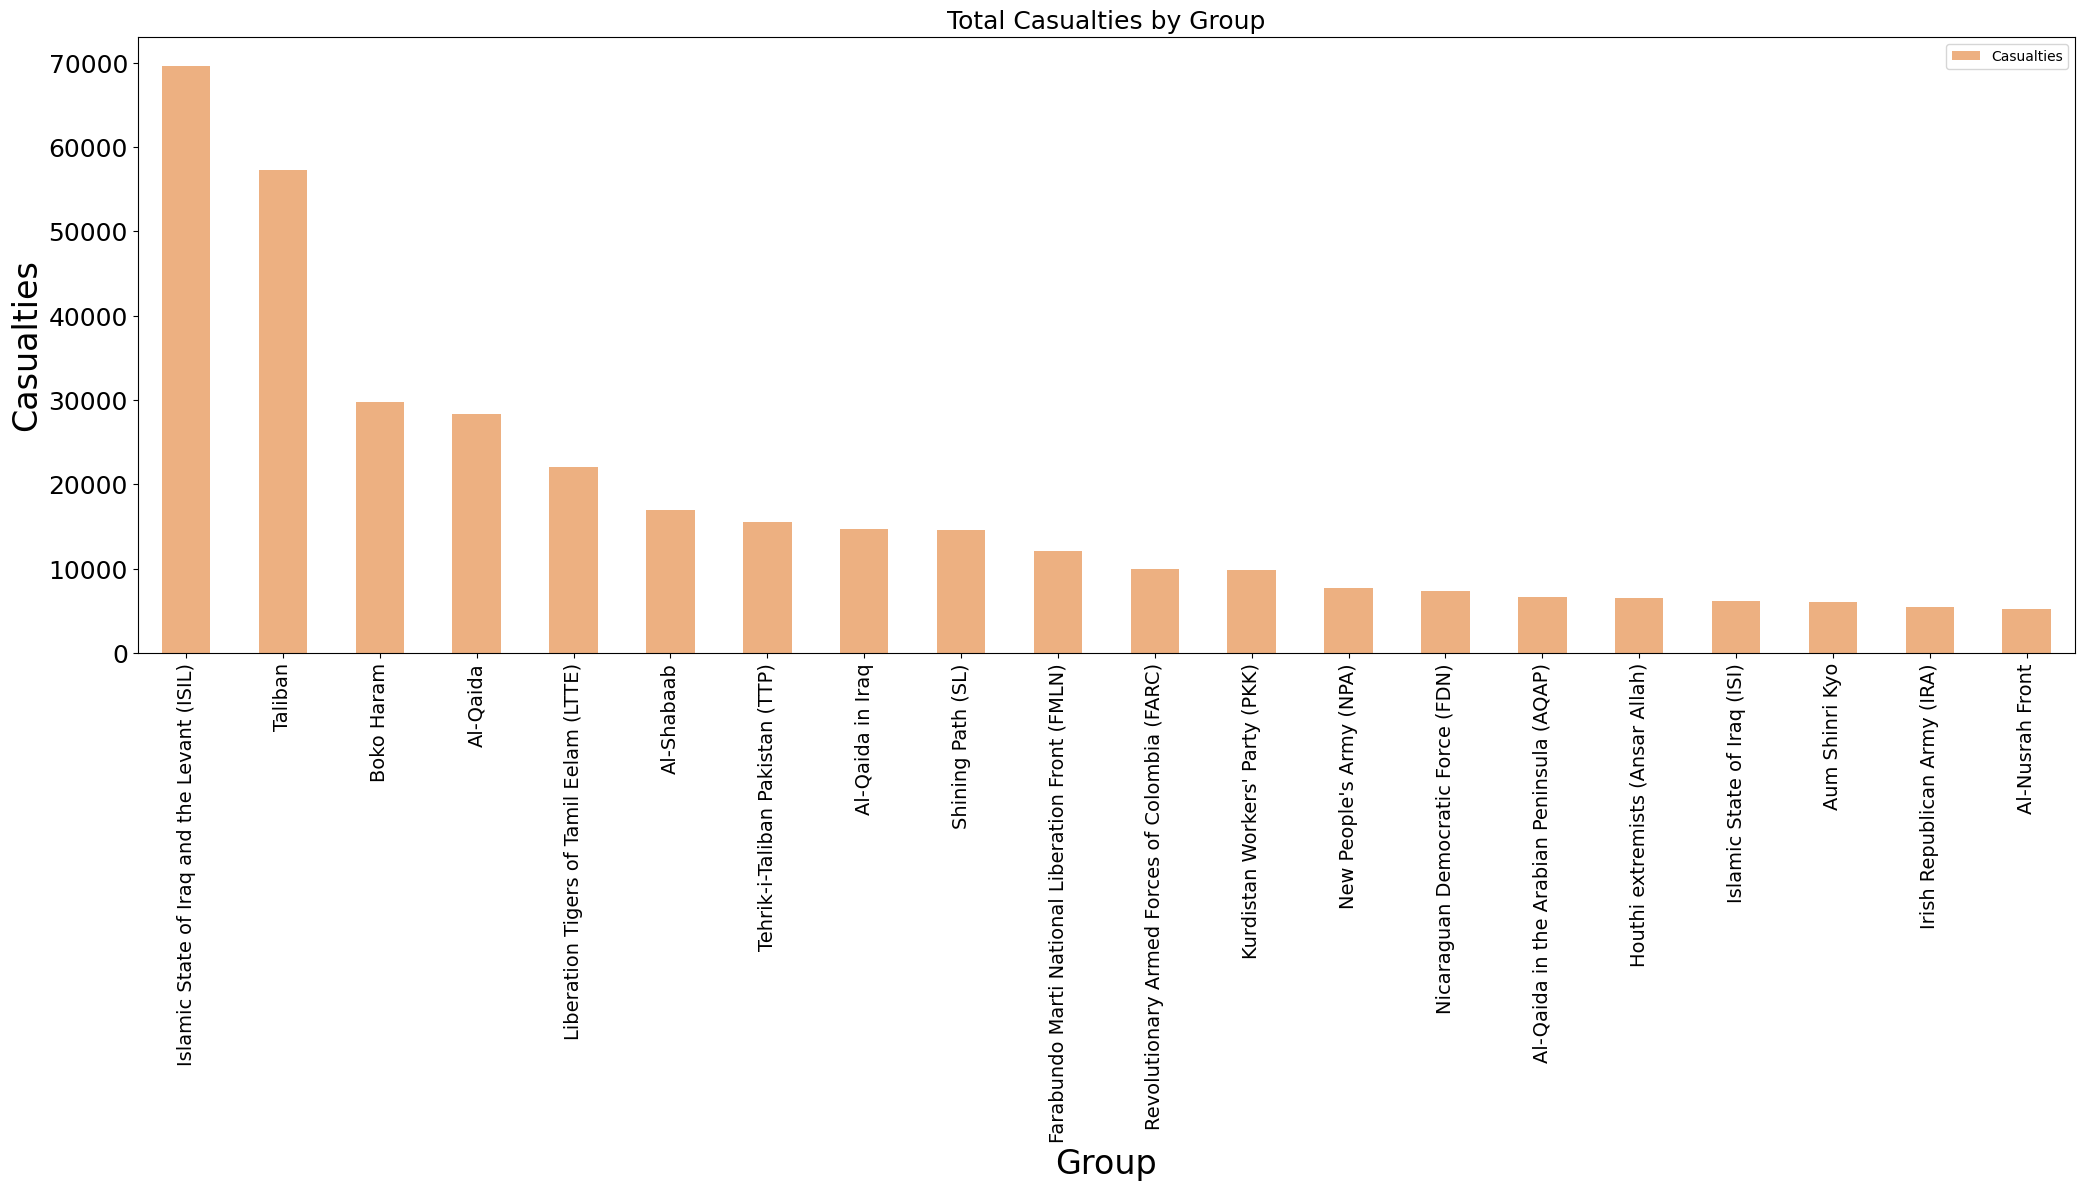

In [40]:
#plot a barplot
tcg.head(20).plot(kind='bar',cmap='flare',figsize=(25,8))
plt.xlabel('Group',fontsize=24)
plt.ylabel('Casualties',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.title('Total Casualties by Group',fontsize=18)
plt.show()

## Attacks by a specific Group in a country 

In [41]:
#gc denotes a group that attacked a specific country
gc=df1[['Group','Country']].value_counts().drop('Unknown')

In [42]:
gc.head(10)

Group                                             Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

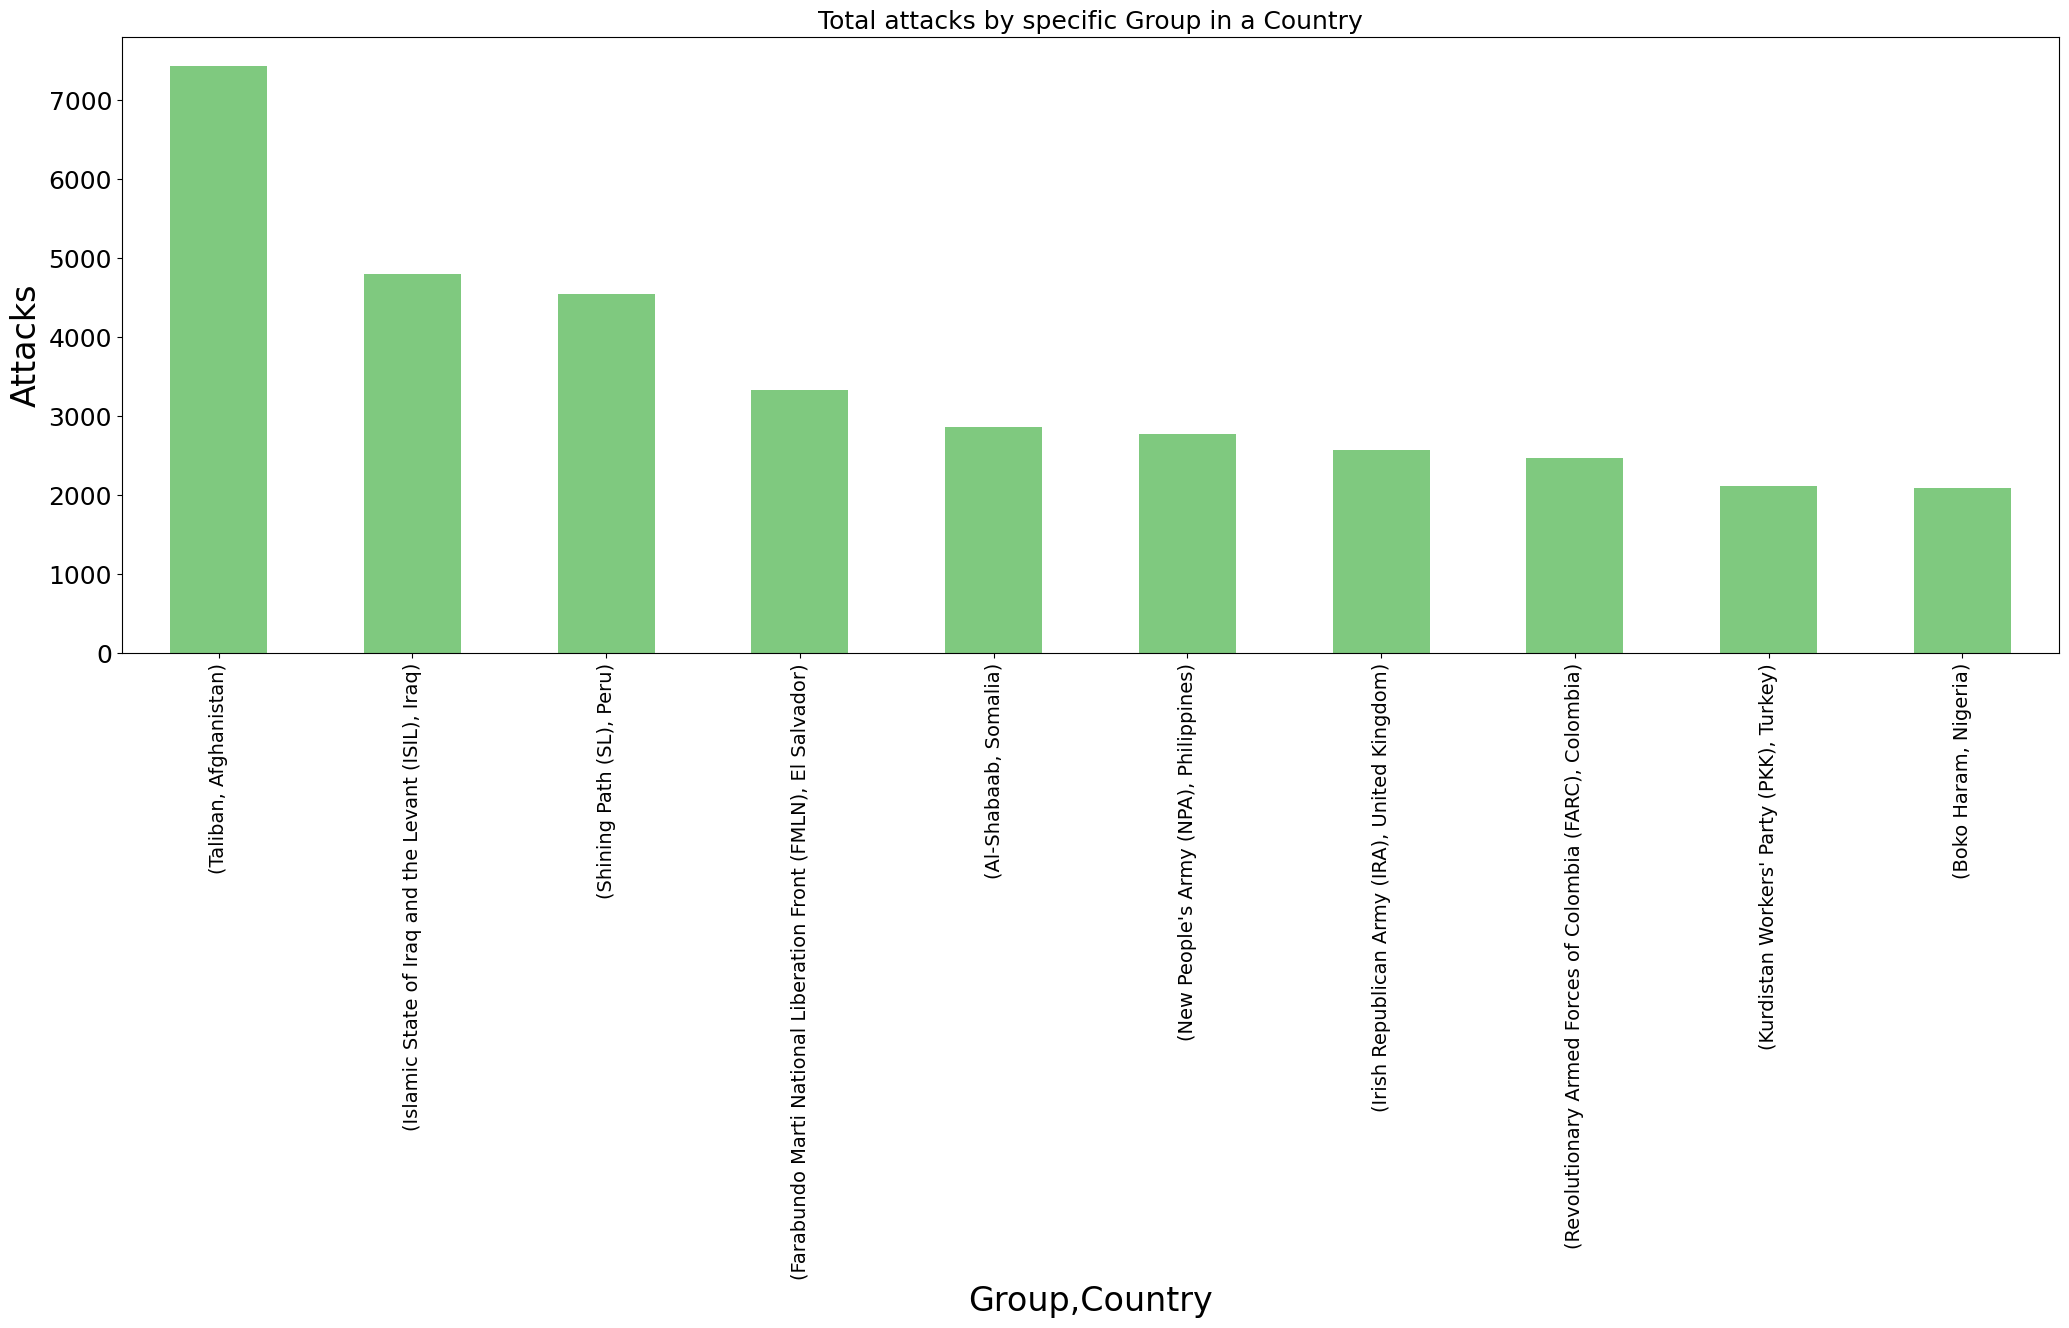

In [43]:
gc.head(10).plot(kind='bar',cmap='Accent',figsize=(25,8))
plt.xlabel('Group,Country',fontsize=24)
plt.ylabel('Attacks',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.title('Total attacks by specific Group in a Country',fontsize=18)
plt.show()

## Most frequently used Weapon type

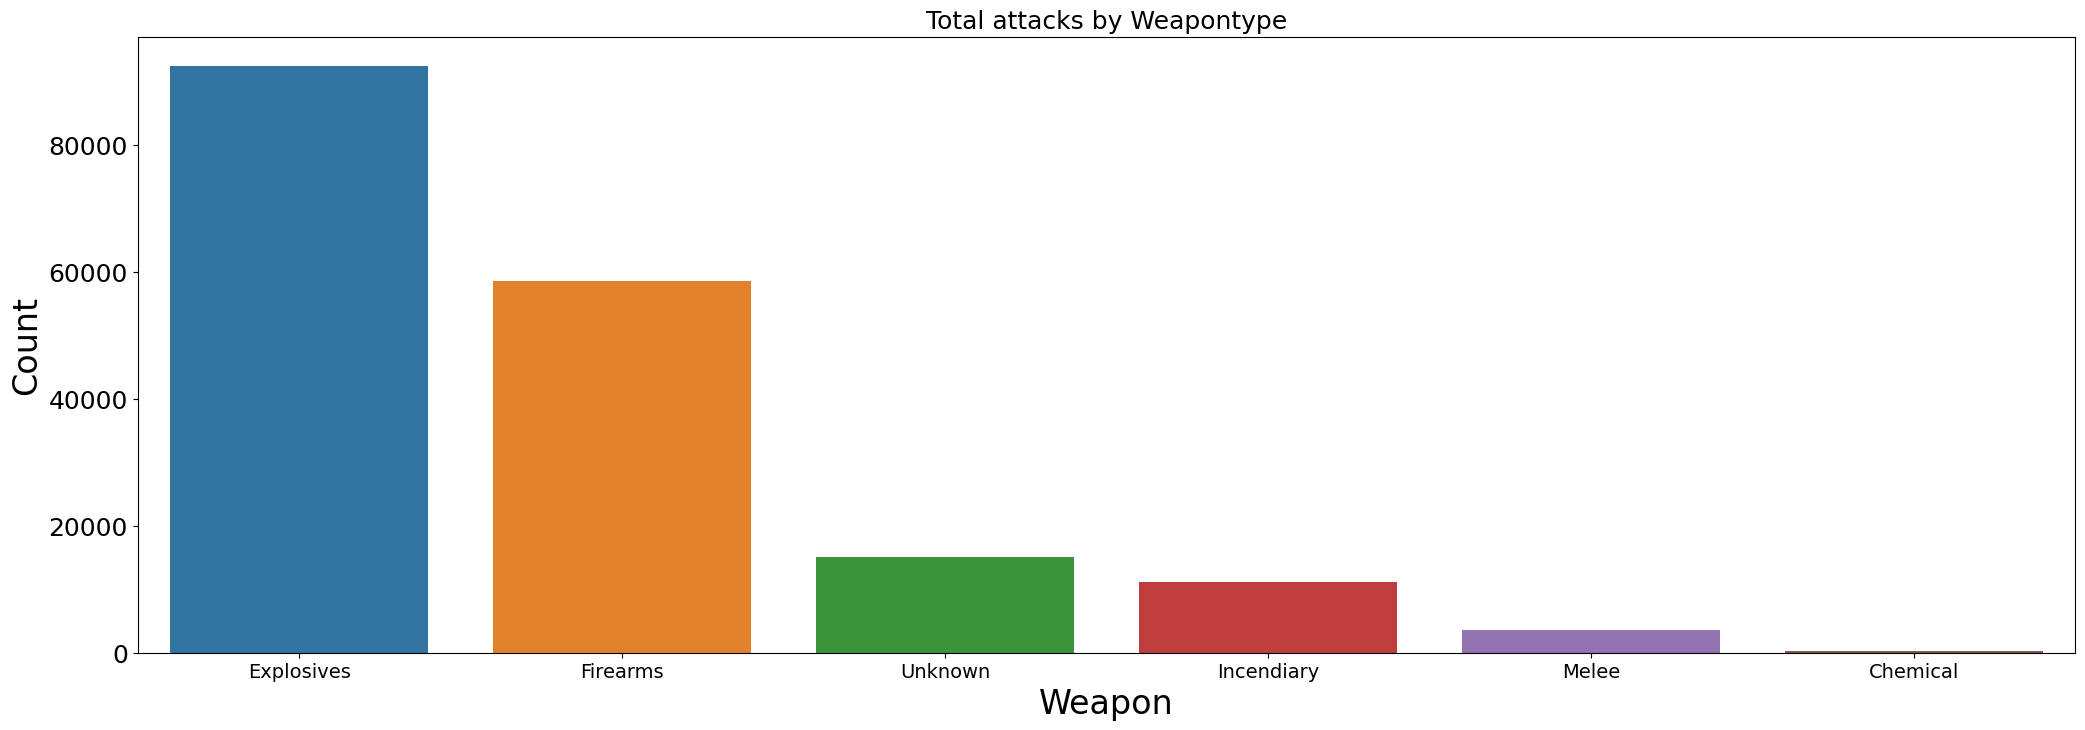

In [44]:
#plot a countplot for weapontype
plt.subplots(figsize=(25,8))
sns.countplot('Weapontype',data=df1,order=df1['Weapontype'].value_counts().index[:6])
plt.xlabel('Weapon',fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.title('Total attacks by Weapontype',fontsize=18)
plt.show()

## Casualties in the most frequent Attack types 

In [45]:
#ac represents the casualties in an attack type
ac=df1[["Attacktype","Casualties"]].groupby("Attacktype").sum().sort_values(by="Casualties",ascending=False)

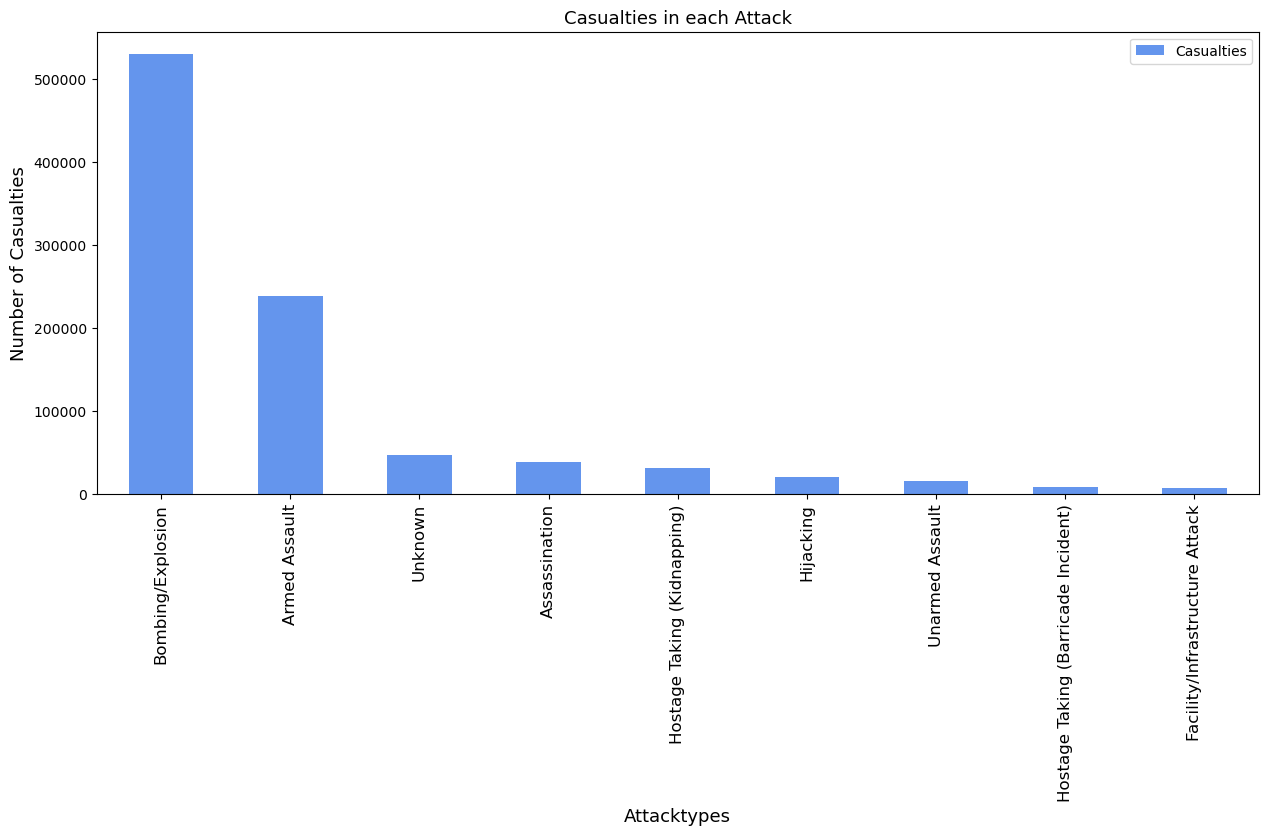

In [46]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attacktypes",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

## Casualties in various Target types 

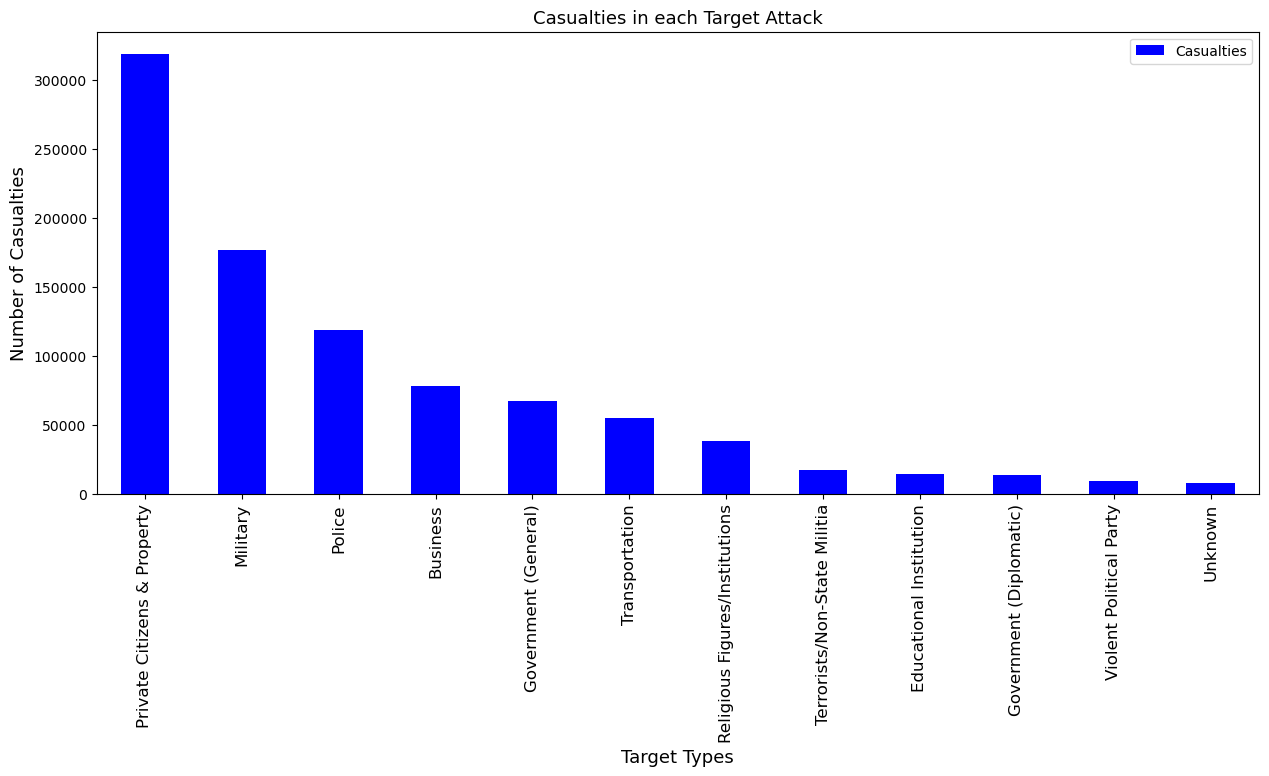

In [47]:
#tc represents the casualties in various target types
tc=df1[["Target_type","Casualties"]].groupby("Target_type").sum().sort_values(by="Casualties",ascending=False)
tc.head(12).plot(kind="bar",color="Blue",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

## Summary

1. The Middle East and North Africa have experienced a disproportionate amount of violence compared to other regions.These two regions have seen a significant number of acts of terrorism, followed by South Asia.
2. Iraq, Pakistan, and Afghanistan are among the countries that have experienced a high number of terrorist attacks over the past few decades.
3. Regrettably, Private citizens and property have often been the primary targets of terrorist attacks and resulted in significant casualties, with many innocent people losing their lives or suffering serious injuries.